## 포스트 코로나 데이터 시각화

- 가설1:  배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.
- 가설2: 유동인구 수가 감소하는 시기에는 바디.헤어 용품의 소비율이 감소할 것이다.

### 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame

import datetime

import warnings
warnings.filterwarnings('ignore')


os.name == 'nt'
plt.rc('font', family='Malgun Gothic')

## 가설1. 배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.

In [2]:
#배달 주문량이 증가함을 시각화 &  배달 업체 수수료 증가 시각화 &  배달팁이 증가함을 보여야 함
dlvr = pd.read_csv("C:/Users/user/Desktop/포스트코로나데이터/delivery.csv")
dlvr.head(5)

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


### 1) 주 단위로 평균량 시각화
* delivery 데이터에서 데이터 순서를 나타내는 'SERIAL_NUMBER' 데이터를 이용해 배달 주문량을 계산
* 'SERIAL_NUMBER'를 주 단위로 count하여 시각화함

In [3]:
#주 단위로 count 하기 (배달 주문량)

dlvr['date'] = pd.to_datetime(dlvr['PROCESS_DT'])
dlvr['date'] = dlvr['date'].apply( lambda dlvr: datetime.datetime(year=dlvr.year, month=dlvr.month, day=dlvr.day))
dlvr.set_index('date',inplace=True)

dlvr_weekly_count = dlvr.resample('W').count()

dlvr_weekly_count.SERIAL_NUMBER

date
2020-01-05    139868
2020-01-12    211683
2020-01-19    186225
2020-01-26    157549
2020-02-02    201385
2020-02-09    218639
2020-02-16    203830
2020-02-23    213952
2020-03-01    226161
2020-03-08    218703
2020-03-15    227710
2020-03-22    216040
2020-03-29    214838
2020-04-05    224843
2020-04-12    215261
2020-04-19    235045
2020-04-26    227818
2020-05-03    218866
2020-05-10    244962
2020-05-17    239050
2020-05-24    207129
2020-05-31    232395
2020-06-07    231228
2020-06-14    159244
2020-06-21     85900
Freq: W-SUN, Name: SERIAL_NUMBER, dtype: int64

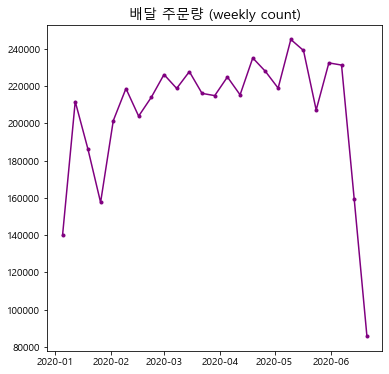

In [4]:
#주문량 시각화 (weekly count)

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(dlvr_weekly_count['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (weekly count)', fontsize = 14)
plt.show()

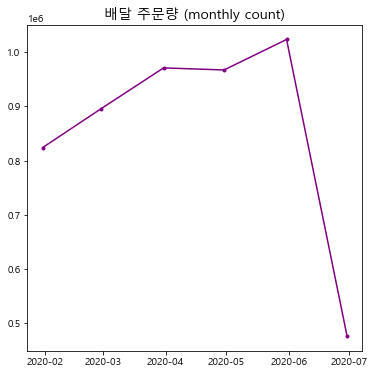

In [5]:
dlvr_monthly_count = dlvr.resample('M').count()

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(dlvr_monthly_count['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (monthly count)', fontsize = 14)
plt.show()

- 결과
    * 4월까지 증가 & 5월에서 6월까지 증가

### 2) 수수료 & 배달비 증가 시각화

In [6]:
#수수료 & 배달비 

dlvr[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]].head(10)

,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT
date,,
2020-01-01,4290,300
2020-01-01,4800,200
2020-01-01,3300,300
2020-01-01,4500,300
2020-01-01,6500,300
2020-01-01,3500,200
2020-01-01,3800,300
2020-01-01,3500,200
2020-01-01,4800,200


- 월 별로 배달비 & 수수료의 변화 추세를 시각화 (평균값)

In [7]:
#월 단위로 평균값 계산
dlvr_weekly_avg = dlvr.resample('W').mean()
dlvr_monthly_avg = dlvr.resample('M').mean()

dlvr_monthly_avg[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]]

,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT
date,,
2020-01-31,3630.214523,260.706505
2020-02-29,3620.551579,262.544649
2020-03-31,3628.074970,268.705586
2020-04-30,3690.031827,272.418702
2020-05-31,3686.859705,269.078660
2020-06-30,3676.117379,268.086023


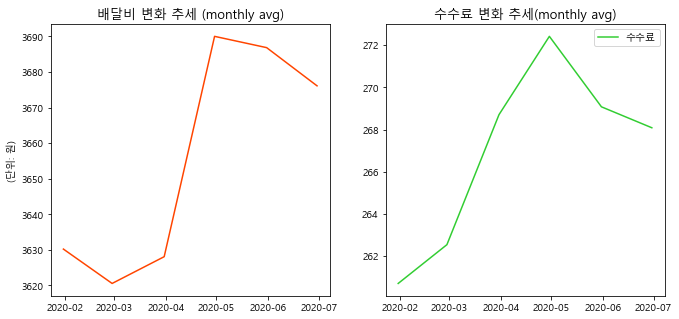

In [9]:
# 시간에 따른 수수료 & 배달비 변화 시각화 -> monthly

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

dlvr_monthly_avg = dlvr.resample('M').mean()

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(dlvr_monthly_avg["DLVR_AMOUNT"], c="orangered", linestyle="-")
ax[1].plot(dlvr_monthly_avg["CALL_RLAY_FEE_AMOUNT"],color="limegreen", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (monthly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(monthly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

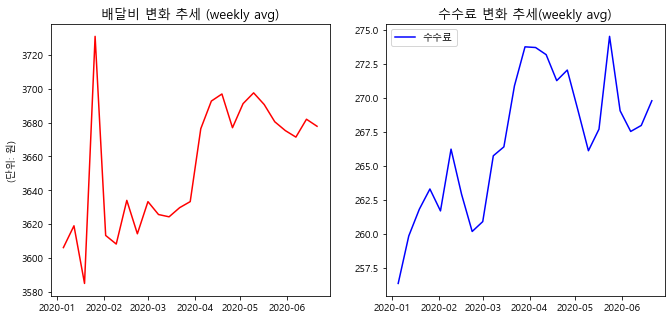

In [10]:
#weekly average

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(dlvr_weekly_avg["DLVR_AMOUNT"], c="r", linestyle="-")
ax[1].plot(dlvr_weekly_avg["CALL_RLAY_FEE_AMOUNT"],color="b", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (weekly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(weekly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

##### -> weekly average 는 기복이 있었고  montly average로 봤을 때는 흐름을 어느 정도 읽을 수 있었다.

-  결과:
   -  배달비와 수수료는 2020년 4월 즈음, 급격하게 증가한 상황을 알 수 있다.
  
   >  배달 주문량의 증가와 배달비 및 수수료의 증가가 서로 연관되어 있다고 추측하였고 
둘의 상관관계가 실제로 존재하는지 확인해보도록 하자.

In [11]:
#주문량과 배달비와의 상관계수 -> weekly

dlvr_weekly_avg.DLVR_AMOUNT.corr(dlvr_weekly_count.SERIAL_NUMBER)

0.026235425791629224

In [12]:
#주문량과 배달비와의 상관계수 -> monthly

dlvr_monthly_avg.DLVR_AMOUNT.corr(dlvr_monthly_count.SERIAL_NUMBER)

-0.0763010208551199

In [13]:
#주문량과 수수료와의 상관계수 -> weekly
            
dlvr_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(dlvr_weekly_count.SERIAL_NUMBER)

0.22971173277920423

In [14]:
#주문량과 수수료와의 상관계수 -> monthly

dlvr_monthly_avg.CALL_RLAY_FEE_AMOUNT.corr(dlvr_monthly_count.SERIAL_NUMBER)

0.17238298687565023

In [15]:
#배달비와 수수료의 상관계수 -> weekly

dlvr_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(dlvr_weekly_count.DLVR_AMOUNT)

0.22971173277920423

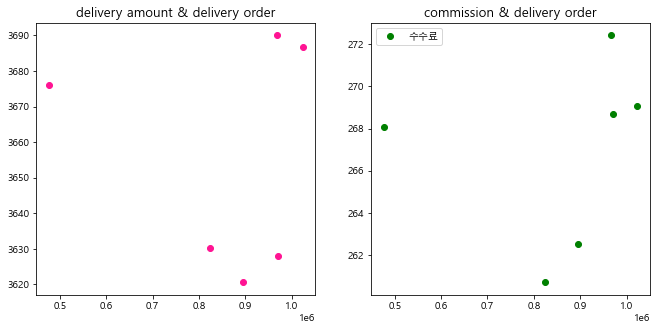

In [25]:
#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> monthly

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(dlvr_monthly_count["SERIAL_NUMBER"], dlvr_monthly_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(dlvr_monthly_count["SERIAL_NUMBER"],dlvr_monthly_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery amount & delivery order",fontsize="13")
ax[1].set_title("commission & delivery order",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- -> monthly는 data 양이 적어 시각화가 어렵다

In [19]:
#주문량과 배달비와의 상관계수 -> monthly

dlvr_monthly_avg.DLVR_AMOUNT.corr(dlvr_monthly_count.SERIAL_NUMBER)

-0.0763010208551199

In [22]:
#주문량과 수수료와의 상관계수 -> monthly

dlvr_monthly_count.SERIAL_NUMBER.corr(dlvr_monthly_avg.CALL_RLAY_FEE_AMOUNT)

0.17238298687565023

- 역시 상관계수를 봐도 관계성이 없음을 알 수 있다.

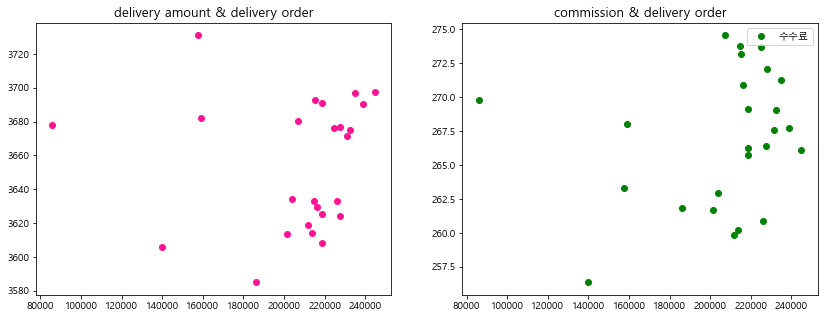

In [26]:
#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> weekly

fig = plt.figure()
fig.set_size_inches(14,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(dlvr_weekly_count["SERIAL_NUMBER"], dlvr_weekly_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(dlvr_weekly_count["SERIAL_NUMBER"],dlvr_weekly_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery amount & delivery order",fontsize="13")
ax[1].set_title("commission & delivery order",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- weekly 그래프 봤을 때, 주문량과 배달비 그래프가 200000건 이후로 기울기가 급한 선형적인 흐름을 어느 정도 확인할 수 있었다.

In [29]:
#주문량과 배달비와의 상관계수 -> weekly

dlvr_weekly_avg.DLVR_AMOUNT.corr(dlvr_weekly_count.SERIAL_NUMBER)

0.026235425791629224

In [28]:
#주문량과 수수료와의 상관계수 -> weekly

dlvr_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(dlvr_weekly_count.SERIAL_NUMBER)

0.22971173277920423

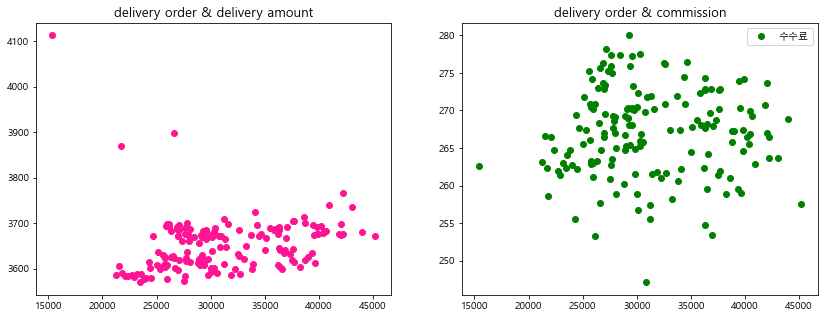

In [24]:
#일 단위로 계산

dlvr_daily_avg = dlvr.resample('D').mean()
dlvr_daily_count = dlvr.resample('D').count()

#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> daily

fig = plt.figure()
fig.set_size_inches(14,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(dlvr_daily_count["SERIAL_NUMBER"], dlvr_daily_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(dlvr_daily_count["SERIAL_NUMBER"],dlvr_daily_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery order & delivery amount",fontsize="13")
ax[1].set_title("delivery order & commission",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- daily로 시각화 했을 때, 주문량 & 배달비 그래프는 상관관계가 있음을 확실히 알 수 있지만 주문량 & 수수료 그래프는 선형보다 원 모양에 근접하므로 관계성이 거의 없다고 볼 수 있다.

In [79]:
#주문량과 배달비와의 상관계수 -> daily

dlvr_daily_avg.DLVR_AMOUNT.corr(dlvr_daily_count.SERIAL_NUMBER)

0.12708551776639143

* 하지만 상관계수를 봤을 때 크게 관련성이 없는 것으로 보인다.

In [30]:
#주문량과 배달비와의 상관계수 -> daily

dlvr_daily_avg.CALL_RLAY_FEE_AMOUNT.corr(dlvr_daily_count.SERIAL_NUMBER)

0.016232295582184565

#### <결과>
  - 여러가지 경우에 따라 시각화를 해봤지만 일정한 패턴을 보이지 않는 것으로 보아 가설 1은 틀렸다.